### Configuration for train dataset

In [1]:
from omegaconf import OmegaConf

config = OmegaConf.load("/home/olive-samba/sambashare/data/Sound/clarity_ICASSP2023/clarity_CEC2_data/clarity_data/metadata/scenes.train.json")

### Hearing Loss Audiogram

In [4]:
import json
json_file = "/home/olive-samba/sambashare/data/Sound/clarity_ICASSP2023/clarity_CEC2_data/clarity_data/metadata/listeners.json"
with open(json_file, "r", encoding="utf-8") as fp:
    listener_audiograms = json.load(fp)
listener_audiograms.keys()

dict_keys(['L0001', 'L0002', 'L0003', 'L0004', 'L0005', 'L0008', 'L0009', 'L0010', 'L0011', 'L0012', 'L0013', 'L0014', 'L0015', 'L0017', 'L0019', 'L0021', 'L0022', 'L0023', 'L0024', 'L0026', 'L0027', 'L0028', 'L0029', 'L0031', 'L0032', 'L0034', 'L0035', 'L0036', 'L0038', 'L0039', 'L0040', 'L0041', 'L0042', 'L0044', 'L0045', 'L0047', 'L0048', 'L0049', 'L0051', 'L0053', 'L0054', 'L0055', 'L0056', 'L0057', 'L0058', 'L0059', 'L0061', 'L0062', 'L0063', 'L0064', 'L0065', 'L0066', 'L0067', 'L0068', 'L0069', 'L0070', 'L0071', 'L0072', 'L0073', 'L0074', 'L0076', 'L0077', 'L0078', 'L0080', 'L0081', 'L0082', 'L0083', 'L0084', 'L0085', 'L0086', 'L0088', 'L0089', 'L0090', 'L0091', 'L0092', 'L0093', 'L0094', 'L0095', 'L0096', 'L0097', 'L0098', 'L0099', 'L0100'])

In [2]:
len(config)

6000

### Load and Save SNR for each training scene 

In [3]:
target_SNR = {}
for conf in config:
    target_SNR[conf['scene']] = conf['SNR']

In [ ]:
target_SNR

In [5]:
from omegaconf import DictConfig
target_SNR = DictConfig(target_SNR)
OmegaConf.save(target_SNR, "./scenes.train.snr.json")

### Load and Save time for each target's start and end

In [53]:
target_time = {}
for conf in config:
    target_time[conf['scene']] = [conf['target']['time_start'], conf['target']['time_end']]

In [55]:
from omegaconf import DictConfig
target_time = DictConfig(target_time)

In [56]:
OmegaConf.save(target_time, "./scenes.train.time.json")

In [57]:
target_time_copy = OmegaConf.load("./scenes.train.time.json")

### Load and Save for each training scene

In [61]:
scene_name_train = []
for conf in config:
    scene_name_train.append(conf["scene"])
OmegaConf.save(scene_name_train, "./scenes.train.scene_name.json")
scene_name_train_copy = OmegaConf.load("./scenes.train.scene_name.json")

In [63]:
len(scene_name_train_copy), len(scene_name_train)


(6000, 6000)

### Check training Data 

In [51]:
time_start = []
time_end = []
name = []
scenes = []
for conf in config:
    scenes.append(conf['scene'])
    name.append(conf['target']['name'])
    time_start.append(conf['target']['time_start'])
    time_end.append(conf['target']['time_end'])


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os

In [50]:
np.array(time_start) - np.array(time_end), scenes

(array([-109809, -137592, -129654, ...,  -82026, -117747, -107163]),
 ['S00001',
  'S00002',
  'S00003',
  'S00004',
  'S00005',
  'S00006',
  'S00007',
  'S00008',
  'S00009',
  'S00010',
  'S00011',
  'S00012',
  'S00013',
  'S00014',
  'S00015',
  'S00016',
  'S00017',
  'S00018',
  'S00019',
  'S00020',
  'S00021',
  'S00022',
  'S00023',
  'S00024',
  'S00025',
  'S00026',
  'S00027',
  'S00028',
  'S00029',
  'S00030',
  'S00031',
  'S00032',
  'S00033',
  'S00034',
  'S00035',
  'S00036',
  'S00037',
  'S00038',
  'S00039',
  'S00040',
  'S00041',
  'S00042',
  'S00043',
  'S00044',
  'S00045',
  'S00046',
  'S00047',
  'S00048',
  'S00049',
  'S00050',
  'S00051',
  'S00052',
  'S00053',
  'S00054',
  'S00055',
  'S00056',
  'S00057',
  'S00058',
  'S00059',
  'S00060',
  'S00061',
  'S00062',
  'S00063',
  'S00064',
  'S00065',
  'S00066',
  'S00067',
  'S00068',
  'S00069',
  'S00070',
  'S00071',
  'S00072',
  'S00073',
  'S00074',
  'S00075',
  'S00076',
  'S00077',
  'S000

In [ ]:
# S00001
# target: T005_JYD_04274 time_start': 86680, 'time_end': 196489

# S00001_hr.wav
# S00001_interferer_CH0.wav
# S00001_interferer_CH1.wav
# S00001_interferer_CH2.wav
# S00001_interferer_CH3.wav
# S00001_mix_CH0.wav
# [V] S00001_mix_CH1.wav
# S00001_mix_CH2.wav
# S00001_mix_CH3.wav
# [V] S00001_target_anechoic_CH1.wav
# S00001_target_CH0.wav
# [V] S00001_target_CH1.wav
# S00001_target_CH2.wav
# S00001_target_CH3.wav

# target/
#     T001_A08_03103.wav

# interferers/noise/
#     CIN_dishwasher_001.wav

# interferers/music/00...99
#     1009600.low.mp3 

# interferers/speech/
#         irm_02484.wav 

In [35]:
root = "/home/olive-samba/sambashare/data/Sound/clarity_ICASSP2023/clarity_CEC2_data/clarity_data"
mix, sr = sf.read(os.path.join(root, "train/scenes/S00001_mix_CH1.wav"))
target, sr = sf.read(os.path.join(root, "train/scenes/S00001_target_CH1.wav"))
target_nonreverb, sr = sf.read(os.path.join(root, "train/scenes/S00001_target_anechoic_CH1.wav"))
target_speech, sr = sf.read(os.path.join(root, "train/targets/T005_JYD_04274.wav"))
start, end = time_start[0], time_end[0]

mix = np.mean(mix, axis=-1)
target_nonreverb = np.mean(target_nonreverb, axis=-1)
target = np.mean(target, axis=-1)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

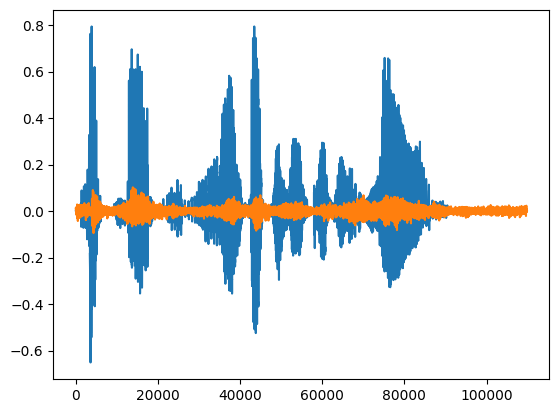

In [42]:
channel = 1
plt.plot(target_speech)
# plt.plot(mix[start:end, channel])
# plt.plot(target_nonreverb[start:end, channel])
# plt.plot(target[start:end, channel])
plt.plot(mix[start:end])
# plt.plot(target_nonreverb[start:end])
# plt.plot(target[start:end])
plt.plot

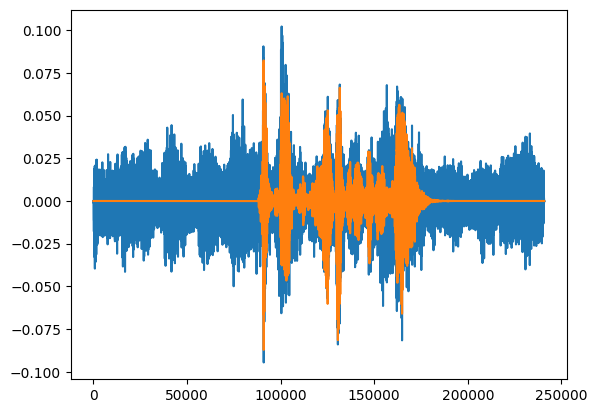

In [46]:
plt.plot(mix)
plt.plot(target)

In [43]:
conf_listener = OmegaConf.load(os.path.join(root, "metadata/listeners.json"))

In [45]:
print(list(conf_listener.keys()))

['L0001', 'L0002', 'L0003', 'L0004', 'L0005', 'L0008', 'L0009', 'L0010', 'L0011', 'L0012', 'L0013', 'L0014', 'L0015', 'L0017', 'L0019', 'L0021', 'L0022', 'L0023', 'L0024', 'L0026', 'L0027', 'L0028', 'L0029', 'L0031', 'L0032', 'L0034', 'L0035', 'L0036', 'L0038', 'L0039', 'L0040', 'L0041', 'L0042', 'L0044', 'L0045', 'L0047', 'L0048', 'L0049', 'L0051', 'L0053', 'L0054', 'L0055', 'L0056', 'L0057', 'L0058', 'L0059', 'L0061', 'L0062', 'L0063', 'L0064', 'L0065', 'L0066', 'L0067', 'L0068', 'L0069', 'L0070', 'L0071', 'L0072', 'L0073', 'L0074', 'L0076', 'L0077', 'L0078', 'L0080', 'L0081', 'L0082', 'L0083', 'L0084', 'L0085', 'L0086', 'L0088', 'L0089', 'L0090', 'L0091', 'L0092', 'L0093', 'L0094', 'L0095', 'L0096', 'L0097', 'L0098', 'L0099', 'L0100']
